# Stylized Horizontal Bar Plot

**Please read this Notebook in its entirety before running it. Thank you!**

## Requirements
This Notebook should run well on Python 3.6.9 or later. The main requirement for it to work is the **drawSvg** library, which is used for drawing vector graphics. drawSvg also requires the **Cairo** library to be previously installed. If you're running the code on an Ubuntu machine, it's possible that Cairo is already installed. If not, you can install it with the command:
```console
$ sudo apt-get install libcairo2-dev
```

drawSvg can also be easily installed using:
```console
$ pip install drawSvg
```

[Click here for more information about Cairo and how to install it on other systems](https://www.cairographics.org/download/) and [click here for more information about drawSvg](https://pypi.org/project/drawSvg/). **Please remember that this Notebook won't work without the drawSvg library installed!**

After you're done reading the Notebook, run it by clicking "**Cell**" and "**Run All**".

## Libraries
We start by importing the library that we will need. In this case, it's just drawSvg.

In [8]:
import drawSvg as draw

## Color function
This next cell contains a function that converts RGB color values to Hex so that it's easier to handle. **Please don't change anything in this cell!**

In [9]:
def rgb2hex(rgb):
    return '#%02x%02x%02x' % rgb

## Data

This next cell is where you will input your data! There are three lists:
* **xData**, containing the numerical data that will be charted. The length of each horizontal bar will be equivalent to these values.
* **yData**, containing the text that will be shown on the left side of each bar. In this example, it's just the numbers from 1 to 10.
* **barLabels**, which contains the labels that will be shown just above each bar.


### A few important things to take into account:

1. The data **must** be written in Python List format, i.e. between square brackets and separated by comma, like this: [element A, element B, element C]
2. All lists **must** be the same length. This means that they all must contain the same number of elements. Other than that, the data lists can be of any length! You can add as many data points as you want, and the code will plot each one of them!

In [10]:
#Write your own data here in List format. Remember that all lists must have the same length.

xData = [65, 26, 79, 231, 666, 273, 126, 93, 161, 57]
yData = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
barLabels = ['1 EUR = 0.969 USD or less', '1 EUR = 0.970 to 0.979 USD', '1 EUR = 0.980 to 0.989 USD', '1 EUR = 0.990 to 0.999 USD', '1 EUR = 1.000 to 1.009 USD', '1 EUR = 1.010 to 1.019 USD', '1 EUR = 1.020 to 1.029 USD', '1 EUR = 1.030 to 1.039 USD', '1 EUR = 1.040 to 1.049 USD', '1 EUR = 1.050 or more']

This next cell is just to reverse the order of the data in the lists. Since the drawing code draws the bars from bottom to top, this will make sure that the data in the chart will be in the correct order. **Don't change anything in this cell!**

In [11]:
#Don't change this part of the code
xData.reverse()
yData.reverse()
barLabels.reverse()

## The drawing code

This next cell is where the magic happens! This part uses the drawSvg library to plot the given data in a horizontal bar chart in the desired style. To do this, it uses a **for** loop and draws a new horizontal bar for each iteration, with its corresponding color, length and labels. The code matches the largest value given in the xData list to the maximum bar length. This means that whatever the largest value in the list is, its bar will be drawn with maximum length! (In this example, the largest value is 666, so it is drawn as a full-length bar).

If you want to apply stylistic changes to the text, you can use CSS commands within the **style="..."** argument. Basically, it's something like this:

```python
style = "font-family:Garamond; font-weight: bold; font-style: italic"
```
1. **font-family** refers to the font style. In this example, it's Garamond. It can be changed to other styles like Arial, Times New Roman, etc. [This page](https://www.w3schools.com/css/css_font.asp) has a list of a few example fonts supported by CSS.
2. **font-weight** allows you to make the text **bold**. To change it back to normal, just use the word "normal".
3. **font-style** allows you to make the text *italic*. To change it back to normal, just use the word "normal".

I suggest not changing anything in this part unless you understand the code well enough!

In [12]:
#Here, I give the code some important values for the drawing

#n is the length of the data set (xData)
n = len(xData)

#fontsize 1 is for the text displaying the numerical value of each bar. 2 is for the label displaying above the bar
#and 3 is for the y value displayed on the left side of the bar.
labelFontSize1 = 30
labelFontSize2 = 22
labelFontSize3 = 22

#imgSide and imgHorSide are the dimensions (y,x respectively) of the image. I suggest not to change the values
#unless you completely understand the code!
imgSide = 100*n
imgHorSide = 700

#These next few variables are the dimensions of other objects in the chart, like the horizontal light grey bars!
greyBarLength = 610
greyBarHeight = 20
colorBarHeight = greyBarHeight

#Now we create a canvas where we will draw the chart
img = draw.Drawing(imgHorSide, imgSide, origin='center', displayInline=False)

#This gives the canvas a white background
img.append(draw.Rectangle(-imgHorSide/2,-imgSide/2,imgHorSide,imgSide, fill='white'))

#Finally, this "for" loop will draw a new bar for each iteration, using the data provided!
for i in range(n):
    #Grey bars
    img.append(draw.Rectangle(-imgHorSide/2+59,imgSide/n*i-imgSide/2+10,greyBarLength,greyBarHeight, fill='#f2f2f2'))
    img.append(draw.Circle(-imgHorSide/2+59+greyBarLength, imgSide/n*i-imgSide/2+greyBarHeight/2+10, greyBarHeight/2, fill='#f2f2f2'))
    #Color bars
    percent = xData[i]/max(xData)
    barValue = (greyBarLength+greyBarHeight/2)*percent-colorBarHeight/2
    img.append(draw.Rectangle(-imgHorSide/2+59,imgSide/n*i-imgSide/2+10,barValue,colorBarHeight, fill=rgb2hex((int(221*(i+1)/n),int(189*(i+1)/n),int(115*(i+1)/n)))))
    img.append(draw.Circle(-imgHorSide/2+59+barValue, imgSide/n*i-imgSide/2+greyBarHeight/2+10, colorBarHeight/2, fill=rgb2hex((int(221*(i+1)/n),int(189*(i+1)/n),int(115*(i+1)/n))), stroke_width=0))
    #Covering white bar on the left side
    img.append(draw.Rectangle(-imgHorSide/2,imgSide/n*i-imgSide/2+10,50,greyBarHeight, fill='#ffffff'))
    #Color bars on the left side
    img.append(draw.Rectangle(-imgHorSide/2+50,imgSide/n*i-imgSide/2+10,10,60, fill=rgb2hex((int(221*(i+1)/n),int(189*(i+1)/n),int(115*(i+1)/n)))))
    #Bar value text (x value)
    img.append(draw.Text(str(xData[i]), labelFontSize1, -imgHorSide/2+65, imgSide/n*i-imgSide/2+27.5+10, style = "font-family:Garamond; font-weight: bold; font-style: normal"))
    #Bar label text
    img.append(draw.Text(str(barLabels[i]), labelFontSize2, -imgHorSide/2+50+110, imgSide/n*i-imgSide/2+30+10, style = "font-family:Garamond; font-weight: normal; font-style: normal"))
    #y Value label text
    img.append(draw.Text(str(yData[i]), labelFontSize3, -imgHorSide/2+20, imgSide/n*i-imgSide/2+10, style = "font-family:Garamond; font-weight: normal; font-style: italic"))

Finally, this next cell will display the drawing as a PNG image or SVG image.

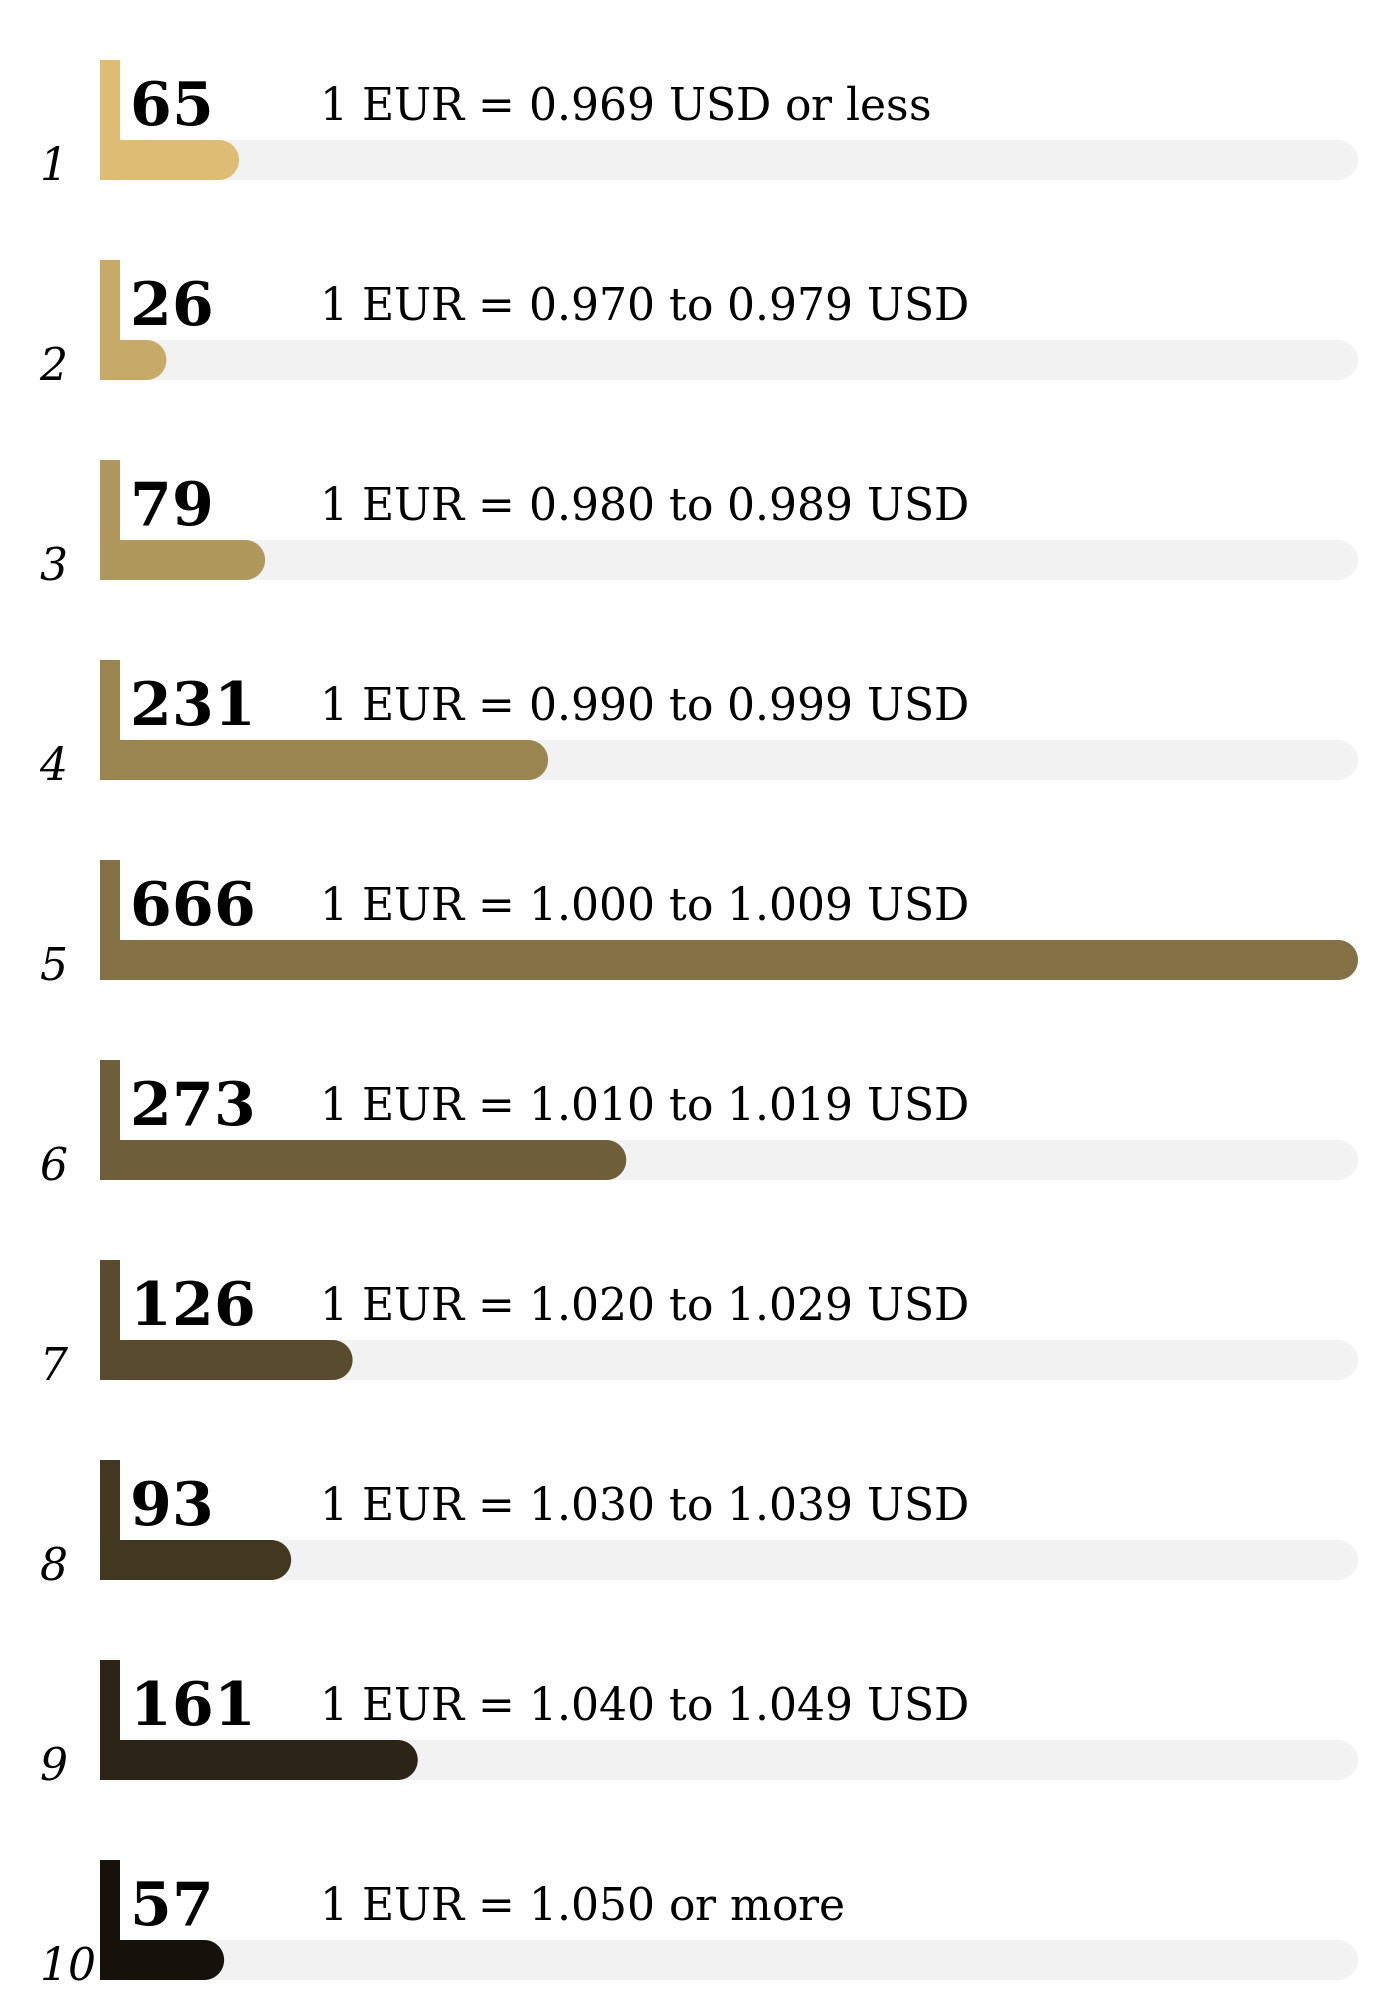

In [13]:
#Set number of pixels per geometry unit
img.setPixelScale(2)

#This displays the plot as a PNG image
img.rasterize()

#This displays the plot as a SVG image. Remove the "#" on the next line if you want to do it.
#img

## Save your file

This last cell will automatically save your chart as a PNG file to your computer with the name "*data_chart.png*".

In [14]:
#Save PNG image
img.savePng('data_chart.png')